<a href="https://colab.research.google.com/github/haidao90/HaiDao_portfolio/blob/main/Copy_of_BAN240_Capstone_Project_Product_Positioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LOADING ORIGINAL DATASET**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Product Positioning1.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Product Positioning1.csv'

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [ ]:
df.describe()

Product ID        Price  Competitor's Price  Sales Volume
count    1000.000000  1000.000000         1000.000000   1000.000000
mean   154899.862000    28.020010           25.550110   1769.311000
std     25795.563607    13.067876           13.156466    718.386603
min    110033.000000     5.060000            0.720000    507.000000
25%    133164.500000    16.917500           14.277500   1136.500000
50%    154694.500000    28.680000           26.145000   1791.500000
75%    176954.250000    39.332500           37.125000   2363.750000
max    199976.000000    49.980000           49.850000   2999.000000

In [ ]:
!pip install ydata-profiling --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.5 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Product Positioning Profiling Report", explorative=True)

profile.to_file("product_positioning_eda.html")

print("Pandas Profiling report has been saved as 'product_positioning_eda.html'.")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report has been saved as 'product_positioning_eda.html'.


In [ ]:
from IPython.display import HTML, display
display(HTML(open("product_positioning_eda.html").read()))

<ipython-input-8-42be5afbabb6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Position', y='Sales Volume', hue='Consumer Demographics', data=df, ci=None, palette='Blues')


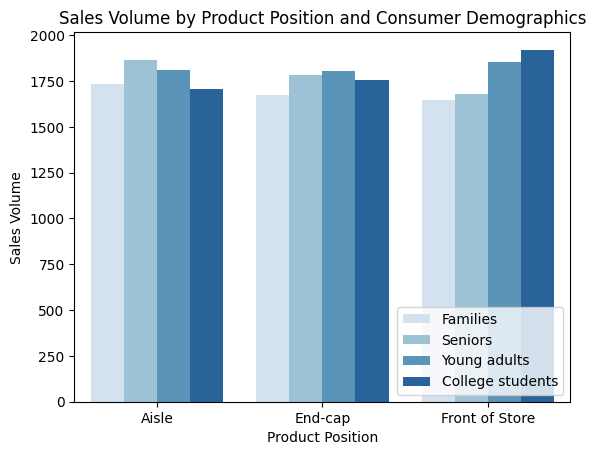

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.subplot(2, 2, 1)
sns.barplot(x='Product Position', y='Sales Volume', hue='Consumer Demographics', data=df, ci=None, palette='Blues')
plt.title('Sales Volume by Product Position and Consumer Demographics')
plt.legend(loc='lower right')

  Product Position  Sales Volume
0            Aisle        605470
1          End-cap        599917
2   Front of Store        563924


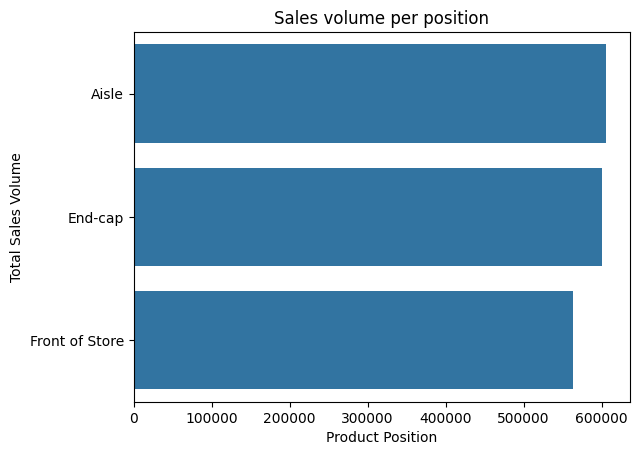

In [ ]:
# Create revenue for each product position
pos_revenue = df.groupby(['Product Position'])['Sales Volume'].sum().reset_index()

print(pos_revenue)
# Plotting
sns.barplot(y='Product Position', x='Sales Volume', data=pos_revenue, legend=False)
plt.title('Sales volume per position')
plt.xlabel('Product Position')
plt.ylabel('Total Sales Volume')
plt.show()

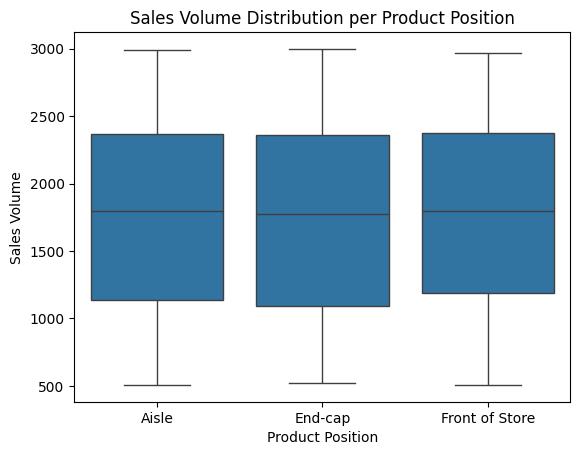

In [ ]:
sns.boxplot(x='Product Position', y='Sales Volume', data=df)
plt.title('Sales Volume Distribution per Product Position')
plt.xlabel('Product Position')
plt.ylabel('Sales Volume')
plt.show()

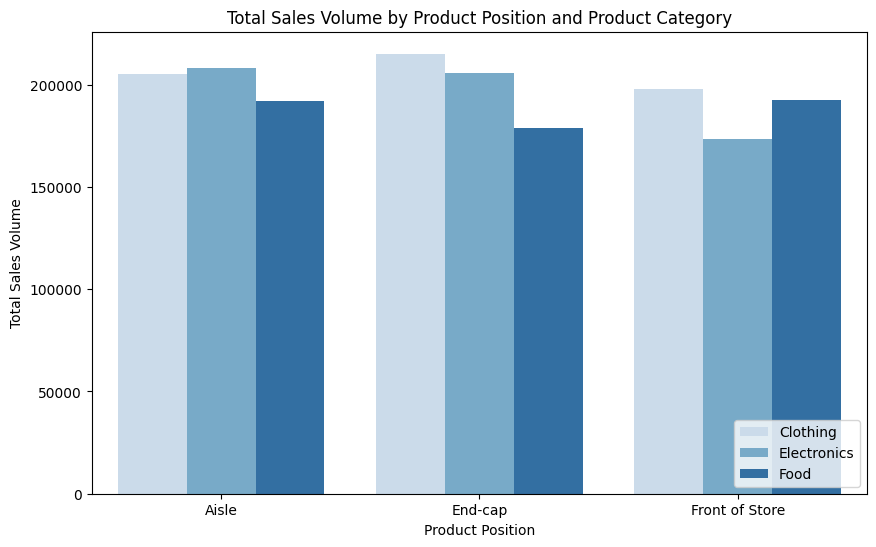

In [ ]:
# Aggregate data
aggregated_data = df.groupby(['Product Category', 'Product Position'])['Sales Volume'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Position', y='Sales Volume', hue='Product Category', data=aggregated_data, palette='Blues')
plt.title('Total Sales Volume by Product Position and Product Category')
plt.legend(loc='lower right')
plt.xlabel('Product Position')
plt.ylabel('Total Sales Volume')
plt.show()

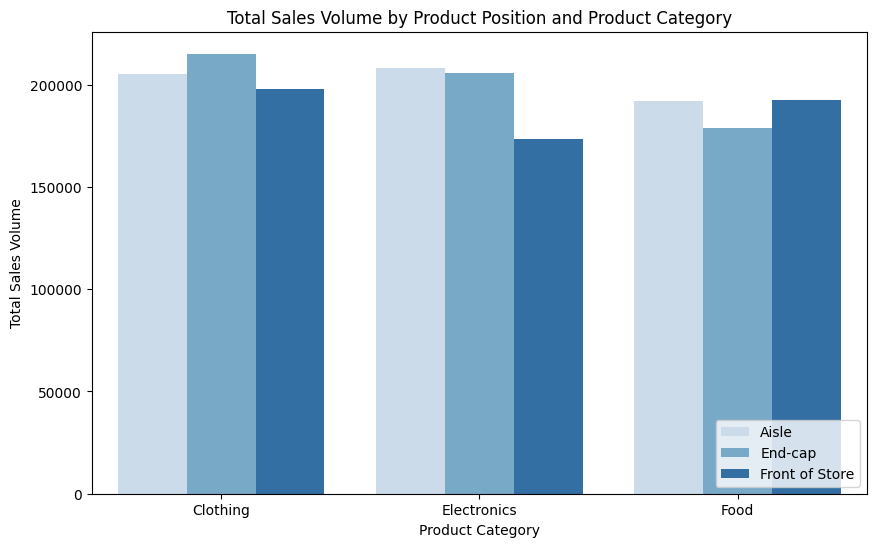

In [ ]:
# Aggregate data
aggregated_data = df.groupby(['Product Category', 'Product Position'])['Sales Volume'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Sales Volume', hue='Product Position', data=aggregated_data, palette='Blues')
plt.title('Total Sales Volume by Product Position and Product Category')
plt.legend(loc='lower right')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.show()

In [ ]:
# Create revenue for demographic
dem_revenue = df.groupby(['Consumer Demographics'])['Sales Volume'].sum().reset_index()
dem_revenue.head()

Consumer Demographics  Sales Volume
0      College students        450063
1              Families        443276
2               Seniors        444089
3          Young adults        431883

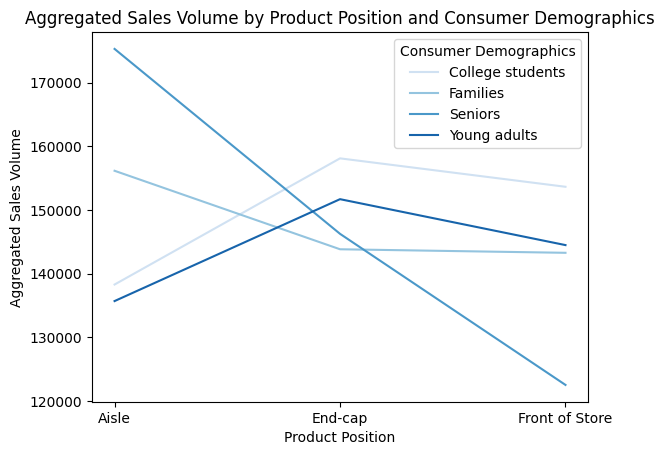

In [ ]:
# Find out the relationship between product position and sales volume, whilst accounting for all demographics
df_aggregated = df.groupby(['Product Position', 'Consumer Demographics'])['Sales Volume'].sum().reset_index()

sns.lineplot(x='Product Position', y='Sales Volume', hue='Consumer Demographics', data=df_aggregated, palette='Blues')
plt.title('Aggregated Sales Volume by Product Position and Consumer Demographics')
plt.xlabel('Product Position')
plt.ylabel('Aggregated Sales Volume')
plt.legend(title='Consumer Demographics')
plt.show()

#**MODELING**

##**Decision Tree**

###Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Preprocessing

df = pd.read_csv('Product Positioning.csv')

df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['Promotion'] = label_encoder.fit_transform(df_encoded['Promotion'])  # promotion: 0-no, 1-yes
df_encoded['Seasonal'] = label_encoder.fit_transform(df_encoded['Seasonal'])    # seasonal: 0-no, 1-yes

traffic_mapping = {'Low':0,'Medium':1,'High':2}                                 # foot traffic: 0-low, 1-medium, 2-high
df_encoded['Foot Traffic'] = df['Foot Traffic'].map(traffic_mapping)

#demographics_mapping = {'College students':0, 'Young adults':1, 'Families':2, 'Seniors':3}              # consumer demographics: 0-college students, 1- young adults, 2-families, 3-seniors
#df_encoded['Consumer Demographics'] = df['Consumer Demographics'].map(demographics_mapping)

df_encoded = pd.get_dummies(df_encoded,columns=['Product Category'])            # one-hot encoding
df_encoded = pd.get_dummies(df_encoded,columns=['Product Position'])
df_encoded = pd.get_dummies(df_encoded,columns=['Consumer Demographics'])

df_clean = df_encoded.astype(float)
df_clean = df_clean.drop(columns=['Product ID'])

In [ ]:
features5 = ['Sales Volume', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Food',	'Consumer Demographics_College students',	'Consumer Demographics_Families',	'Consumer Demographics_Seniors', 'Consumer Demographics_Young adults']
X5 = df_clean[features5]
y5 = df['Product Position']

Accuracy: 0.335
Precision: 0.3330348886086591
Recall: 0.335
F1-Score: 0.33308812425844025
Confusion Matrix:
 [[28 20 20]
 [26 19 21]
 [24 22 20]]
Classification Report:
                 precision    recall  f1-score   support

         Aisle       0.36      0.41      0.38        68
       End-cap       0.31      0.29      0.30        66
Front of Store       0.33      0.30      0.31        66

      accuracy                           0.34       200
     macro avg       0.33      0.33      0.33       200
  weighted avg       0.33      0.34      0.33       200

ROC-AUC: 0.5007471554881564


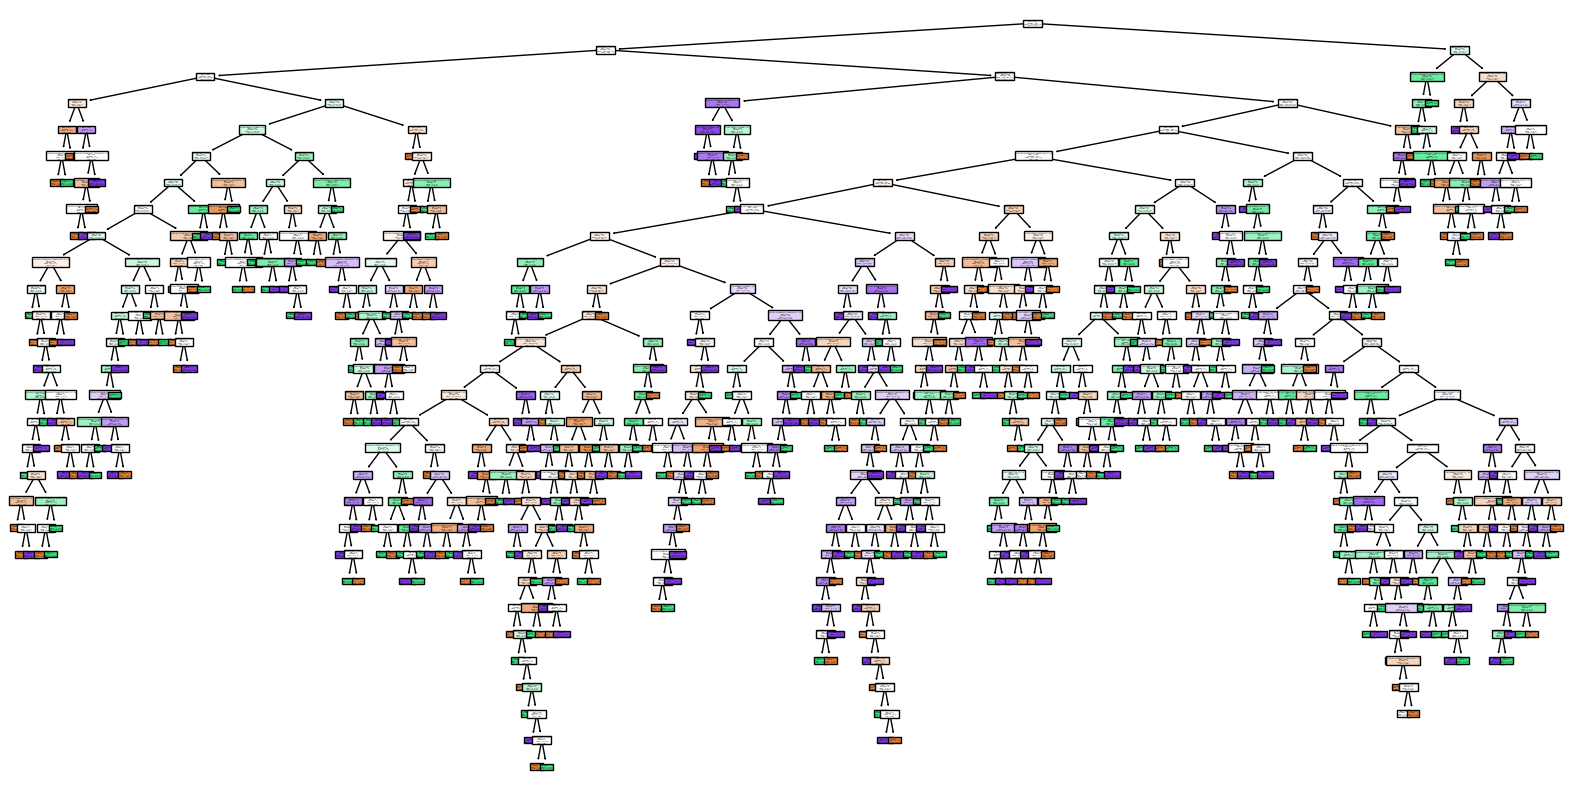

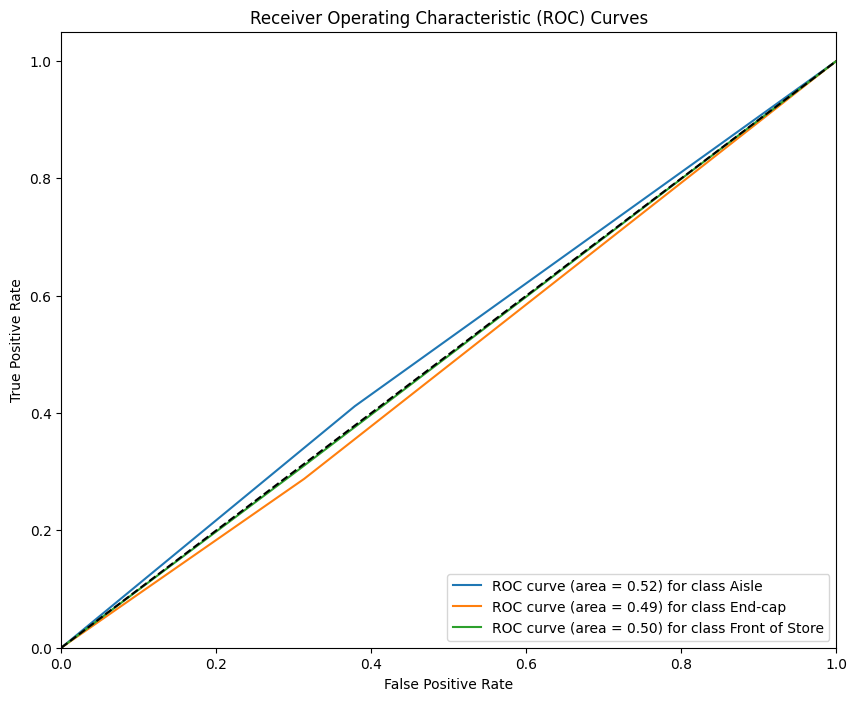

In [ ]:
# Fit the label encoder to the target variable 'Product Position'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Product Position'])

# Split the data into training and testing sets (using y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X5, y_encoded, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict the target variable for the test set  #This line was moved up
y_pred = clf.predict(X_test)

# Plot the decision tree (using the fitted label_encoder)
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X5.columns,
               class_names=label_encoder.classes_,  # Use classes from the fitted encoder
               filled=True)

# Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Since this is a multi-class problem, we handle ROC-AUC differently
# We need to get the probabilities for each class
y_prob = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("ROC-AUC:", roc_auc)

# Plot ROC Curves for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plotting the ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

###Decision Tree Application

In [ ]:
# Function to get user input and predict product position
def get_prediction():
    # Interactive input
    sales_volume = float(input("Enter Sales Volume (500-3000): "))
    product_category = input("Enter Product Category (Clothing, Electronics, Food): ")
    consumer_demographics = input("Enter Consumer Demographics (College students, Families, Seniors, Young adults): ")

    # Prepare the input DataFrame
    input_data = pd.DataFrame([{
        'Sales Volume': sales_volume,
        'Product Category_Clothing': 1.0 if product_category == 'Clothing' else 0.0,
        'Product Category_Electronics': 1.0 if product_category == 'Electronics' else 0.0,
        'Product Category_Food': 1.0 if product_category == 'Food' else 0.0,
        'Consumer Demographics_College students': 1.0 if consumer_demographics == 'College students' else 0.0,
        'Consumer Demographics_Families': 1.0 if consumer_demographics == 'Families' else 0.0,
        'Consumer Demographics_Seniors': 1.0 if consumer_demographics == 'Seniors' else 0.0,
        'Consumer Demographics_Young adults': 1.0 if consumer_demographics == 'Young adults' else 0.0
    }])

    # Ensure all columns are present
    for col in X5.columns:  # Use X5 instead of X_encoded
        if col not in input_data.columns:
            input_data[col] = 0.0

    # Make predictions
    y_prediction_numeric = clf.predict(input_data)

    # Handle potentially unseen labels
    predicted_position = label_encoder.inverse_transform(y_prediction_numeric)
    print(f"Recommended Product Position: {predicted_position[0]}")

In [ ]:
# Run the interactive prediction
get_prediction()

Enter Sales Volume (500-3000): 2500
Enter Product Category (Clothing, Electronics, Food): Food
Enter Consumer Demographics (College students, Families, Seniors, Young adults): Seniors
Recommended Product Position: Aisle


##**K-Modes Clustering**



###K-Modes Clustering Model

In [ ]:
!pip install kmodes

Cluster 0: Ideal Product Position is Front of Store
Cluster 1: Ideal Product Position is Aisle
Cluster 2: Ideal Product Position is End-cap
Model Test Accuracy: 0.41
Precision: 0.42
Recall: 0.41
F1-Score: 0.41
Confusion Matrix:
[[36 21 11]
 [28 24 14]
 [23 21 22]]
Classification Report:
                precision    recall  f1-score   support

         Aisle       0.41      0.53      0.46        68
       End-cap       0.36      0.36      0.36        66
Front of Store       0.47      0.33      0.39        66

      accuracy                           0.41       200
     macro avg       0.42      0.41      0.41       200
  weighted avg       0.42      0.41      0.41       200

ROC-AUC Score: 0.58


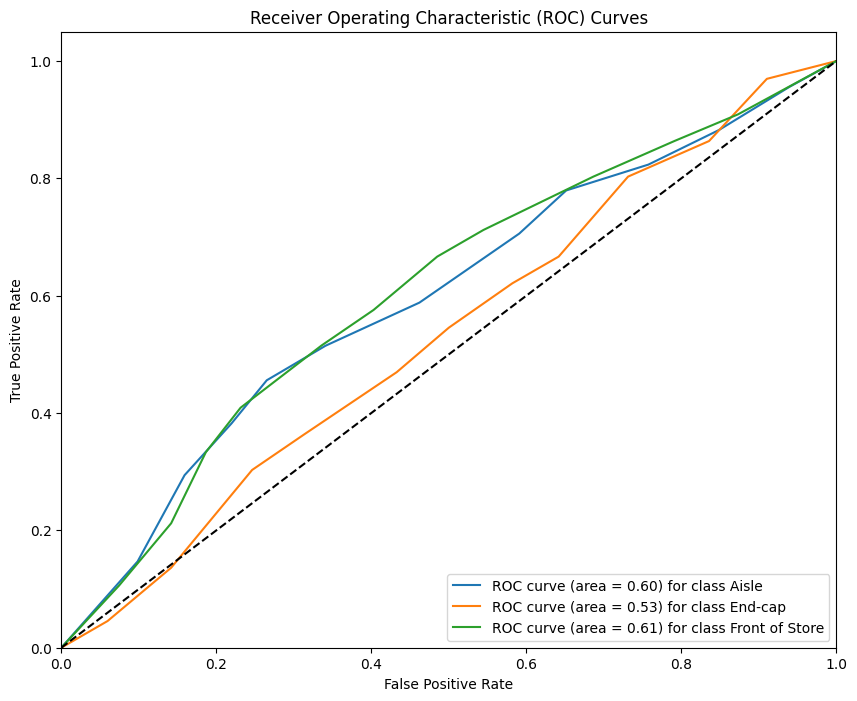

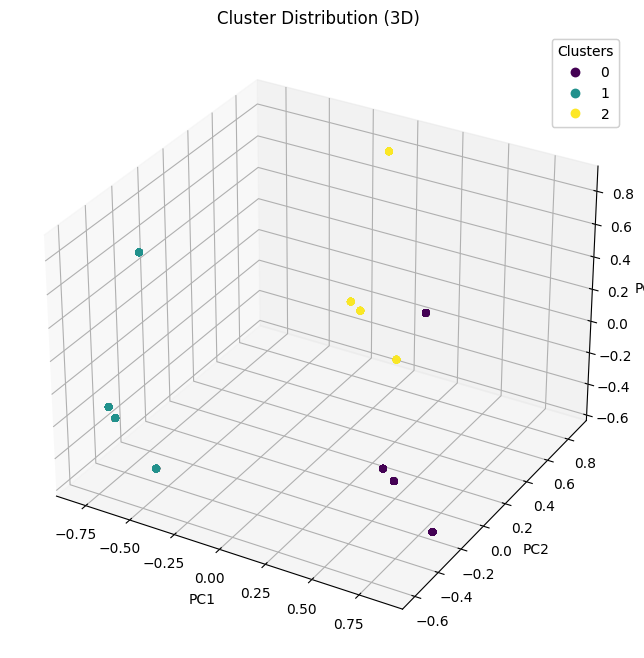

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
file_path = 'Product Positioning.csv'
data = pd.read_csv(file_path)

# Select relevant features
features = ['Consumer Demographics', 'Product Category']
target = 'Product Position'

# Preprocess the features using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), features)
    ])

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data[target])

# Define the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_processed = pipeline.fit_transform(data[features])

# Perform k-modes clustering
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, random_state=42)
clusters = kmodes.fit_predict(X_processed.toarray())

# Add cluster labels to the original data
data['Cluster'] = clusters

# Determine the ideal product position for each cluster based on average sales volume
ideal_positions = []
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    ideal_position = cluster_data.groupby('Product Position')['Sales Volume'].mean().idxmax()
    ideal_positions.append((cluster, ideal_position))

# Display the ideal product position for each cluster
for cluster, position in ideal_positions:
    print(f'Cluster {cluster}: Ideal Product Position is {position}')

# Train a classifier to predict product position based on cluster and features
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_processed, y_encoded)

# Function to recommend the best product position based on cluster analysis
def recommend_product_position(consumer_demographics, product_category):
    input_data = pd.DataFrame({
        'Consumer Demographics': [consumer_demographics],
        'Product Category': [product_category]
    })

    input_data_processed = pipeline.transform(input_data)
    # Predict the product position using the trained classifier
    predicted_position_encoded = classifier.predict(input_data_processed)[0]
    predicted_position = label_encoder.inverse_transform([predicted_position_encoded])[0]
    return predicted_position

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Predict on the test set
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f'Model Test Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Compute ROC curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Reduce dimensions for 3D visualization
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_processed.toarray())

# Visualize the cluster distribution in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')

# Add legend and titles
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Cluster Distribution (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

###K-Modes Clustering Application

Available Consumer Demographics options: Families, Seniors, Young adults, College students
Available Product Category options: Clothing, Electronics, Food
Enter Consumer Demographics: Seniors
Enter Product Category: Food
The recommended product position for Food targeting Seniors is: Front of Store
Predicted cluster for input data: 2


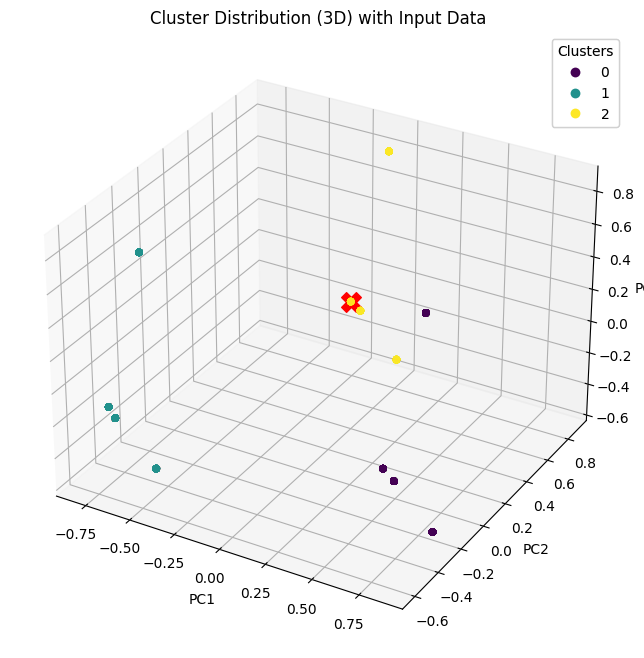

In [ ]:
# Visualize the clustering and the input-to-cluster prediction
def visualize_cluster(input_data):
    input_data_processed = pipeline.transform(input_data)
    cluster = kmodes.predict(input_data_processed.toarray())[0]
    print(f"Predicted cluster for input data: {cluster}")

    # Reduce dimensions for input data
    input_reduced = pca.transform(input_data_processed.toarray())

    # Plot the clusters and the new input point
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')
    # Plot the input data as a red 'X' marker
    ax.scatter(input_reduced[:, 0], input_reduced[:, 1], input_reduced[:, 2], c='red', marker='X', s=200)

    # Add legend and titles
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title('Cluster Distribution (3D) with Input Data')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

# Displaying available options for user input
available_demographics = data['Consumer Demographics'].unique()
available_categories = data['Product Category'].unique()
print("Available Consumer Demographics options:", ", ".join(available_demographics))
print("Available Product Category options:", ", ".join(available_categories))

# Interactive user input
consumer_demographics = input("Enter Consumer Demographics: ")
product_category = input("Enter Product Category: ")

# Recommend and display the best product position
best_position = recommend_product_position(consumer_demographics, product_category)
print(f'The recommended product position for {product_category} targeting {consumer_demographics} is: {best_position}')

# Example usage and visualization
input_data = pd.DataFrame({
    'Consumer Demographics': [consumer_demographics],
    'Product Category': [product_category]
})

# Visualize the new input data in the cluster distribution
visualize_cluster(input_data)

`Red 'X' Marker`: This marker represents the new input data point. It is plotted in the same reduced dimensionality space as the other points. The position of this marker helps you visualize which cluster the new input data is closest to, indicating its cluster assignment.



##**Gradient Boost Regressor**

###Gradient Boost Regressor Model

Training Accuracy: 0.38
Validation Accuracy: 0.38
Precision: 0.39
Recall: 0.38
F1-Score: 0.37
Confusion Matrix:
[[35 26  7]
 [27 27 12]
 [28 24 14]]
Classification Report:
                precision    recall  f1-score   support

         Aisle       0.39      0.51      0.44        68
       End-cap       0.35      0.41      0.38        66
Front of Store       0.42      0.21      0.28        66

      accuracy                           0.38       200
     macro avg       0.39      0.38      0.37       200
  weighted avg       0.39      0.38      0.37       200

ROC-AUC Score: 0.54


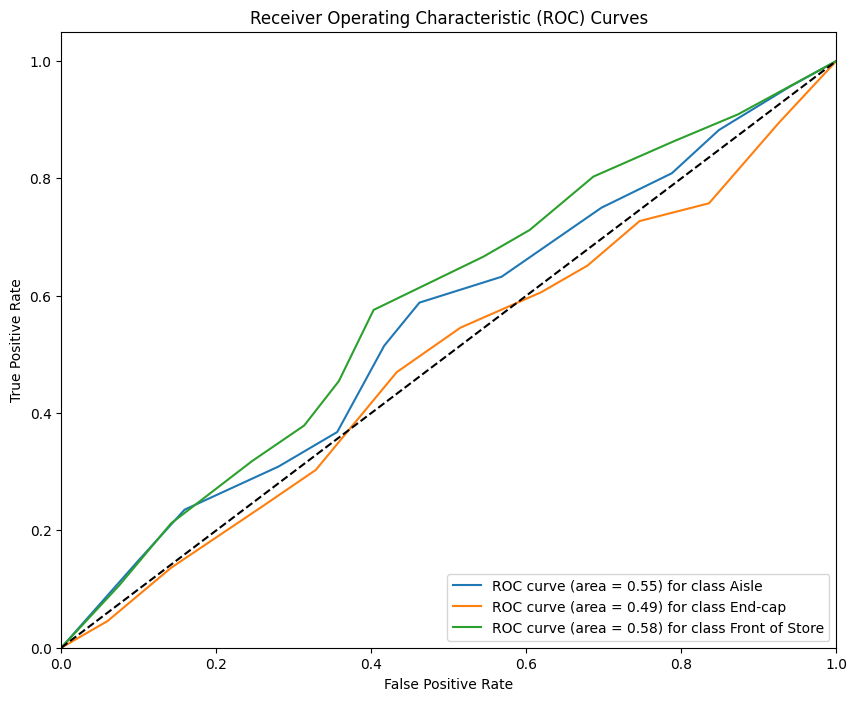

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Product Positioning.csv'
data = pd.read_csv(file_path)

# Select relevant features
features = ['Consumer Demographics', 'Product Category']
target = 'Product Position'

# Extract features and target
X = data[features]
y = data[target]

# Preprocess categorical features using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# Define the model pipeline with GradientBoostingClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {test_accuracy:.2f}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# ROC-AUC Score
# Compute ROC AUC score for each class
y_test_bin = pd.get_dummies(y_test)  # Convert y_test to binary format for ROC calculation
roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_test_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin.iloc[:, i], y_test_prob[:, i])

# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

###Gradient Boost Regressor Application

In [ ]:
# Function to recommend the best product position
def recommend_product_position(consumer_demographics, product_category):
    input_data = pd.DataFrame({
        'Consumer Demographics': [consumer_demographics],
        'Product Category': [product_category]
    })

    input_data_encoded = model.named_steps['preprocessor'].transform(input_data)
    predicted_position = model.named_steps['classifier'].predict(input_data_encoded)
    return predicted_position[0]

# Function to project sales volume based on demographics and product category
def project_sales_volume(consumer_demographics, product_category):
    relevant_data = data[(data['Consumer Demographics'] == consumer_demographics) &
                         (data['Product Category'] == product_category)]
    if not relevant_data.empty:
        projected_volume = int(round(relevant_data['Sales Volume'].mean()))
        return projected_volume
    else:
        return "No historical data available for projection"

# Displaying available options for user input
available_demographics = data['Consumer Demographics'].unique()
available_categories = data['Product Category'].unique()

print("Available Consumer Demographics options:", ", ".join(available_demographics))
print("Available Product Category options:", ", ".join(available_categories))

# Interactive user input
consumer_demographics = input("Enter Consumer Demographics: ")
product_category = input("Enter Product Category: ")

# Making recommendation
best_position = recommend_product_position(consumer_demographics, product_category)
print(f'The recommended product position for {product_category} targeting {consumer_demographics} is: {best_position}')

##**Linear Regression**

###Linear Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error,
                             median_absolute_error, explained_variance_score)

# Load the dataset
file_path = 'Product Positioning.csv'
data = pd.read_csv(file_path)

# Select relevant features
features = ['Consumer Demographics', 'Product Category', 'Sales Volume']
target = 'Product Position'

# Extract features and target
X = data[features]
y = data[target]

# Preprocess categorical features using one-hot encoding and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Consumer Demographics', 'Product Category']),
        ('num', StandardScaler(), ['Sales Volume'])
    ])

# Encode the target variable using LabelEncoder (ensure this is suitable for your task)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_encoded = model.predict(X_test)

# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))
y_test = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the model
r_squared = r2_score(y_test_encoded, y_pred_encoded)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
rmse = mse**0.5
medae = median_absolute_error(y_test_encoded, y_pred_encoded)
explained_var = explained_variance_score(y_test_encoded, y_pred_encoded)

print(f'R-squared: {r_squared:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Median Absolute Error (MedAE): {medae:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')

# Cross-validation scores
cv_scores = cross_val_score(model, X, y_encoded, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean Cross-validated R-squared: {cv_scores.mean():.2f}')
print(f'Standard Deviation of Cross-validated R-squared: {cv_scores.std():.2f}')


R-squared: -0.01
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.68
Root Mean Squared Error (RMSE): 0.82
Median Absolute Error (MedAE): 0.96
Explained Variance Score: -0.01
Cross-validated R-squared scores: [-0.01457557 -0.00790296 -0.00770171 -0.0387698  -0.01661701]
Mean Cross-validated R-squared: -0.02
Standard Deviation of Cross-validated R-squared: 0.01


###Linear Regression Application

In [ ]:
# Function to recommend the best product position based on user input
def recommend_product_position():
    # Get user input
    print("Available Consumer Demographics options:", ", ".join(data['Consumer Demographics'].unique()))
    consumer_demographics = input("Enter Consumer Demographics: ")
    print("Available Product Category options:", ", ".join(data['Product Category'].unique()))
    product_category = input("Enter Product Category: ")
    # For this example, we set Sales Volume to 0, as it's not part of user input
    sales_volume = 0

    # Prepare the input data
    input_data = pd.DataFrame({
        'Consumer Demographics': [consumer_demographics],
        'Product Category': [product_category],
        'Sales Volume': [sales_volume]
    })

    # Preprocess the input data
    input_data_processed = model.named_steps['preprocessor'].transform(input_data)

    # Predict the product position
    predicted_position_encoded = model.named_steps['regressor'].predict(input_data_processed)
    predicted_position_encoded = int(round(predicted_position_encoded[0]))  # Round to nearest integer
    predicted_position = label_encoder.inverse_transform([predicted_position_encoded])[0]

    # Display the recommendation
    print(f'Recommended Product Position: {predicted_position}')

# Call the recommendation function
recommend_product_position()

##**Neural Networks**

###Neural Network Model

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3367 - loss: 1.1001 - val_accuracy: 0.3600 - val_loss: 1.0978
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3156 - loss: 1.1023 - val_accuracy: 0.3400 - val_loss: 1.0991
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3679 - loss: 1.0934 - val_accuracy: 0.3100 - val_loss: 1.1034
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3698 - loss: 1.0920 - val_accuracy: 0.3400 - val_loss: 1.1033
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.0923 - val_accuracy: 0.3250 - val_loss: 1.1056
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4154 - loss: 1.0863 - val_accuracy: 0.3300 - val_loss: 1.1062
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3465 - loss: 1.1042 
Model Test Accuracy: 0.36
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
[[23 32 13]
 [19 33 14]
 [15 35 16]]
Classification Report:
                precision    recall

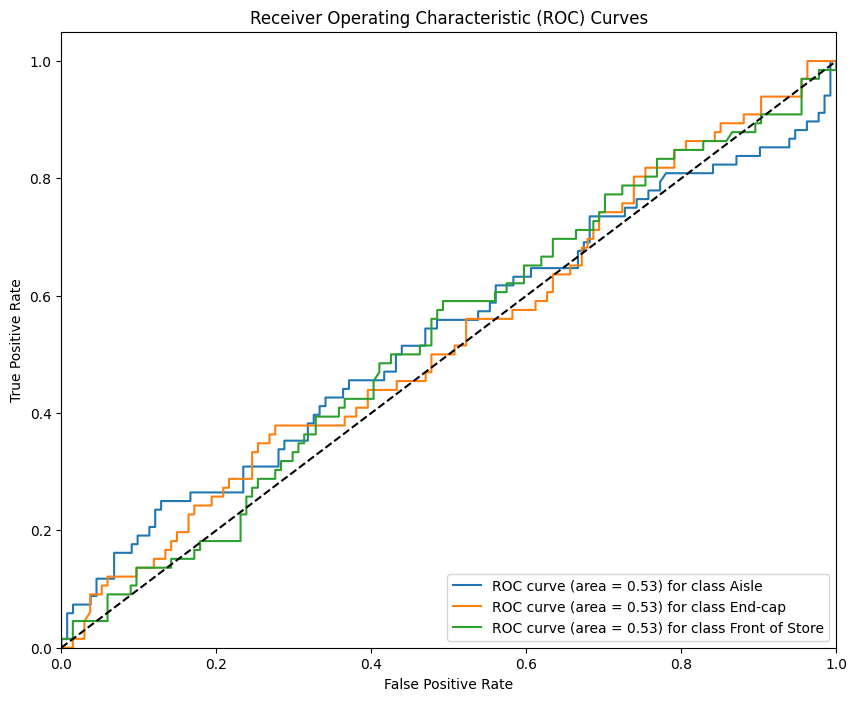

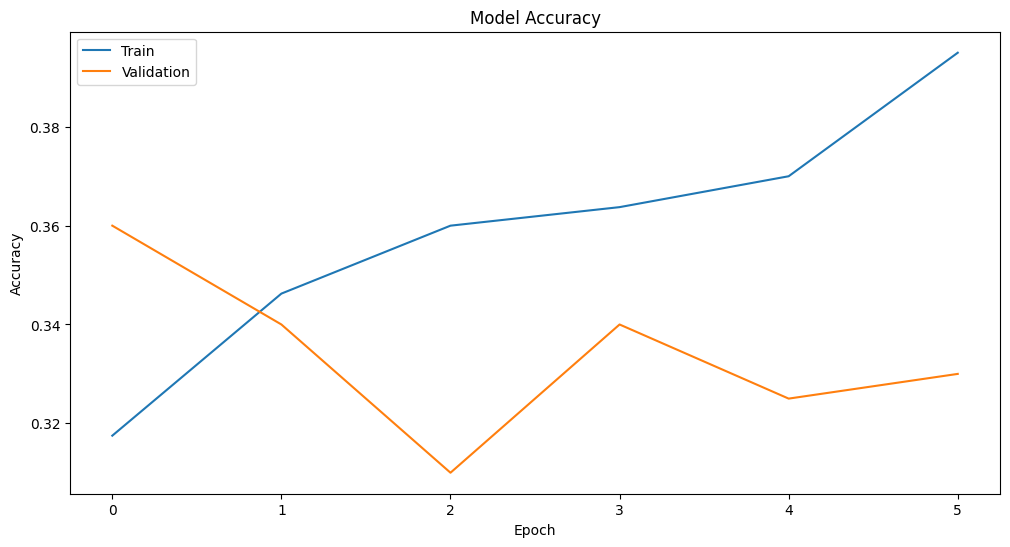

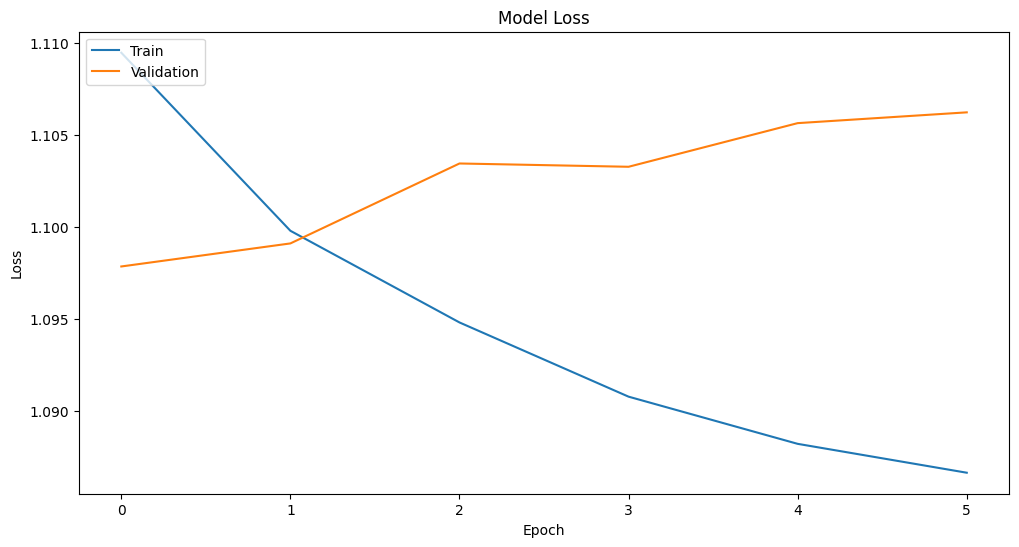

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Product Positioning.csv'
data = pd.read_csv(file_path)

# Specify features and target
features = ['Consumer Demographics', 'Product Category', 'Sales Volume']
target = 'Product Position'

# Preprocess categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Consumer Demographics', 'Product Category']),
        ('num', StandardScaler(), ['Sales Volume'])
    ])

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data[target])
y_encoded_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_onehot, test_size=0.2, random_state=42)

# Preprocess the features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the neural network model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_processed, y_train, validation_data=(X_test_processed, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f'Model Test Accuracy: {test_accuracy:.2f}')

# Predict on the test set
y_test_pred_prob = model.predict(X_test_processed)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

# Evaluate the model using additional metrics
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test_actual, y_test_pred, target_names=label_encoder.classes_))

precision = precision_score(y_test_actual, y_test_pred, average='weighted')
recall = recall_score(y_test_actual, y_test_pred, average='weighted')
f1 = f1_score(y_test_actual, y_test_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# ROC-AUC Score
y_test_bin = tf.keras.utils.to_categorical(y_test_actual, num_classes=len(label_encoder.classes_))
roc_auc = roc_auc_score(y_test_bin, y_test_pred_prob, multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# ROC Curves for each class
plt.figure(figsize=(10, 8))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {label_encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Neural Network Application

In [ ]:
# Function to recommend the best product position based on user input
def recommend_product_position():
    # Display options for user input
    print("Available Consumer Demographics options:", ", ".join(data['Consumer Demographics'].unique()))
    print("Available Product Category options:", ", ".join(data['Product Category'].unique()))

    # Get user input
    consumer_demographics = input("Enter Consumer Demographics: ")
    product_category = input("Enter Product Category: ")
    # For this example, we set Sales Volume to 0, as it's not part of user input
    sales_volume = 0

    # Prepare the input data
    input_data = pd.DataFrame({
        'Consumer Demographics': [consumer_demographics],
        'Product Category': [product_category],
        'Sales Volume': [sales_volume]
    })

    # Preprocess the input data
    input_data_processed = preprocessor.transform(input_data)

    # Predict the product position
    predicted_position_encoded = model.predict(input_data_processed)
    predicted_position = label_encoder.inverse_transform([np.argmax(predicted_position_encoded)])[0]

    # Display the recommendation
    print(f'Recommended Product Position: {predicted_position}')

# Call the recommendation function
recommend_product_position()

NameError: name 'data' is not defined